In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [24]:
# First week of 2019.
DATE_START = pd.to_datetime('2018-12-31 00:00:00-05:00')
# Last week of 2020.
DATE_END = pd.to_datetime('2020-01-25 00:00:00-05:00')

# First week of 2020.
DATE_START_PLOT = pd.to_datetime('2019-12-30 00:00:00-05:00')
# CUTOFF BEFORE DATA GAP
DATE_END_PLOT = pd.to_datetime('2020-11-23 00:00:00-05:00')

# Start of COVID-19 Pre-Pandemic Period
DATE_START_PRE_COVID = pd.to_datetime('2019-03-18 00:00:00-05:00')
DATE_END_PRE_COVID = pd.to_datetime('2019-11-25 00:00:00-05:00')

# Start of COVID-19 Pandemic Period
DATE_START_COVID = pd.to_datetime('2020-03-16 00:00:00-04:00')
DATE_END_COVID = pd.to_datetime('2020-11-23 00:00:00-04:00')

# First week of 2019 - 1 week.
DATE_START_ROLLING = pd.to_datetime('2018-12-24 00:00:00-05:00')
# Last week of 2020 + 1 week.
DATE_END_ROLLING = pd.to_datetime('2021-02-01 00:00:00-05:00')

In [22]:
def peek(df):
    display(df.iloc[0:3, :])
    print(len(df))

In [2]:
def repair_dates(df):
    df['date_range_start'] = pd.to_datetime(df['date_range_start'], utc=True)
    df['date_range_start'] = df['date_range_start'].dt.tz_convert('US/Eastern')

In [3]:
def test(df, metric, attr, class1, class2):
    """Returns the results of two-sample T-Test and K-S test on the given
    dataframes for the given attribute."""
    df1 = df[df[attr] == class1]
    df2 = df[df[attr] == class2]
    t_results = stats.ttest_ind(df1[metric].dropna(), df2[metric].dropna())
    ks_results = stats.ks_2samp(df1[metric].dropna(), df2[metric].dropna())
    return [t_results.pvalue, ks_results.pvalue]

In [4]:
cdi_total_df = pd.read_csv('./exports/cdi/total_all.csv')
repair_dates(cdi_total_df)
cdi_total_df['week'] = cdi_total_df['date_range_start'].dt.week

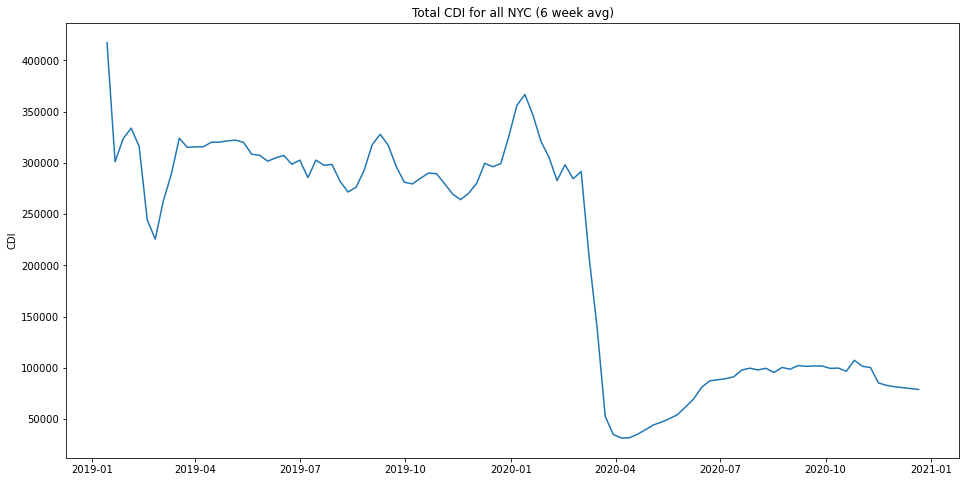

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(cdi_total_df['date_range_start'], cdi_total_df['cdi'])
ax.set_title('Total CDI for all NYC (6 week avg)')
ax.set_ylabel('CDI')
plt.show()

In [6]:
cdi_total_df['date_range_end'] = cdi_total_df['date_range_start'] + timedelta(days=7)
cdi_total_df['year'] = cdi_total_df['date_range_end'].dt.year

In [7]:
test(cdi_total_df, 'cdi', 'year', 2019, 2020)

[6.743275790396281e-20, 3.431475620512199e-16]

We can reject the hypothesis that CDI from 2019 and 2020 follow the same distribution.

In [8]:
cdi_cluster_df = pd.read_csv('./exports/cdi/total_by_cluster.csv')
repair_dates(cdi_cluster_df)
cdi_cluster_df = cdi_cluster_df[cdi_cluster_df['date_range_start'].dt.year == 2020]

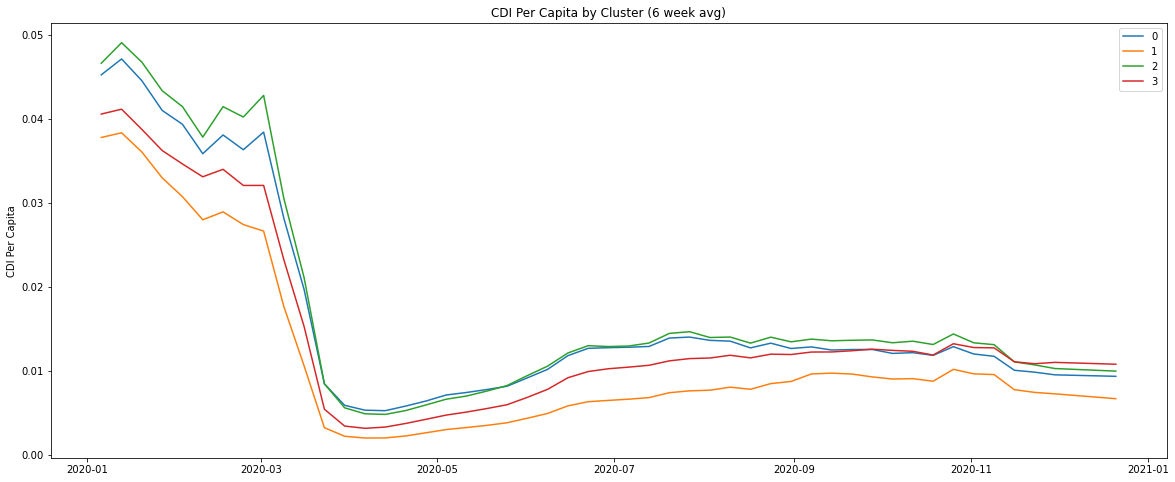

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
for key, group in cdi_cluster_df.groupby(by=['cluster']):
    ax.plot(group['date_range_start'], group['cdi_per_capita'], label=key)
ax.set_title('CDI Per Capita by Cluster (6 week avg)')
ax.set_ylabel('CDI Per Capita')
ax.legend()
plt.show()

In [10]:
print(0, 1, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 1))
print(0, 2, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 2))
print(0, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 3))
print(1, 2, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 1, 2))
print(1, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 1, 3))
print(2, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 2, 3))

0 1 [0.024356113078924466, 1.0672724824992323e-05]
0 2 [0.7140545224691148, 0.019754137896767714]
0 3 [0.38953249882162266, 0.10591425451435192]
1 2 [0.011183060710016486, 1.1538080891883593e-06]
1 3 [0.13769146640682617, 1.0672724824992323e-05]
2 3 [0.22681005831060658, 0.0004890957804413903]


We can reject the hypothesis that cluster 0 and 1 follow the same distribution.\
We can reject the hypothesis that cluster 1 and 2 follow the same distribution.

In [11]:
cdi_cluster_diff_df = pd.read_csv('./exports/cdi/diff_by_cluster.csv')
repair_dates(cdi_cluster_diff_df)

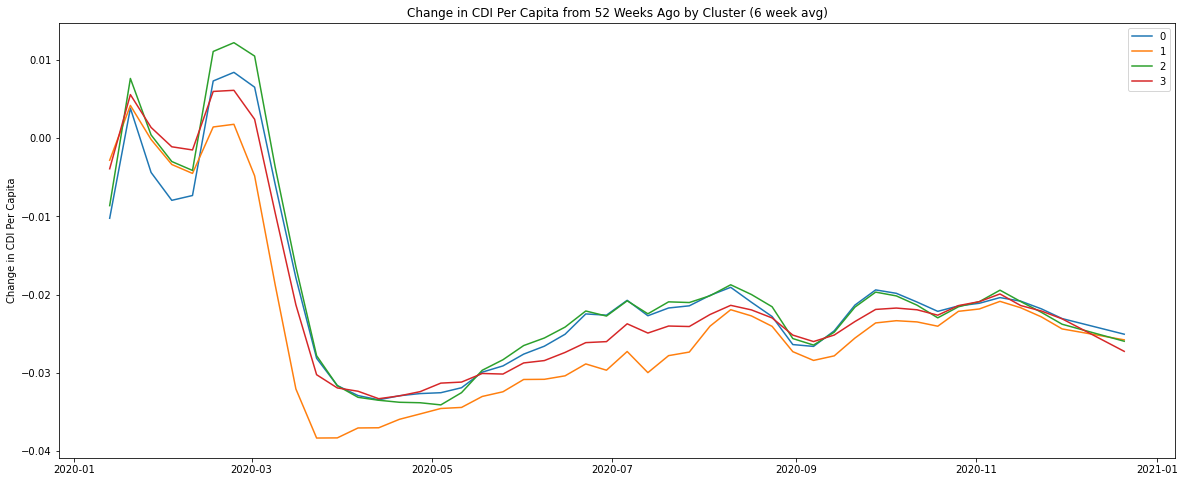

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
for key, group in cdi_cluster_diff_df.groupby(by=['cluster']):
    ax.plot(group['date_range_start'], group['cdi_per_capita'], label=key)
ax.set_title(
    'Change in CDI Per Capita from 52 Weeks Ago by Cluster (6 week avg)')
ax.set_ylabel('Change in CDI Per Capita')
ax.legend()
plt.show()

In [13]:
print(0, 1, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 1))
print(0, 2, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 2))
print(0, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 3))
print(1, 2, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 1, 2))
print(1, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 1, 3))
print(2, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 2, 3))

0 1 [0.13623447822224558, 0.01790296070526876]
0 2 [0.7523582637573036, 0.9969212833348372]
0 3 [0.805252041968943, 0.3707025699757679]
1 2 [0.088125423586817, 0.01790296070526876]
1 3 [0.22281604382458062, 0.2502930720844449]
2 3 [0.5891002571091184, 0.2502930720844449]


We can reject the hypothesis that cluster 1 and 2 follow the same distribution.

In [35]:
cdi_borough_df = pd.read_csv('./exports/cdi/total_by_borough.csv')
repair_dates(cdi_borough_df)
cdi_borough_covid_df = cdi_borough_df[cdi_borough_df['date_range_start'] >= DATE_START_COVID]
cdi_borough_covid_df.head()

,date_range_start,borough,cdi,population,cdi_per_capita
315,2020-03-16 00:00:00-04:00,Bronx,32499.803082,1435068,0.022647
316,2020-03-16 00:00:00-04:00,Kings,44409.277068,2589966,0.017147
317,2020-03-16 00:00:00-04:00,Manhattan,20459.747918,1631991,0.012537
318,2020-03-16 00:00:00-04:00,Queens,34017.229676,2287377,0.014872
319,2020-03-16 00:00:00-04:00,Staten Island,7106.658050,474890,0.014965


In [34]:
b = [
   'Bronx',
   'Kings',
   'Manhattan',
   'Queens',
   'Staten Island',
]

print(b[0], b[1], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[0], b[1]))
print(b[0], b[2], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[0], b[2]))
print(b[0], b[3], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[0], b[3]))
print(b[0], b[4], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[0], b[4]))
print(b[1], b[2], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[1], b[2]))
print(b[1], b[3], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[1], b[3]))
print(b[1], b[4], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[1], b[4]))
print(b[2], b[3], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[2], b[3]))
print(b[2], b[4], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[2], b[4]))
print(b[3], b[4], test(cdi_borough_covid_df, 'cdi_per_capita', 'borough', b[3], b[4]))

Bronx Kings [0.07140562021157346, 6.628328255708552e-05]
Bronx Manhattan [3.057981735331003e-10, 6.789332424635626e-07]
Bronx Queens [0.0015893244345027114, 2.309871967898435e-05]
Bronx Staten Island [0.24048247498982137, 0.005570741642816115]
Kings Manhattan [1.586343799947794e-07, 2.342319686499291e-06]
Kings Queens [0.11860757213307314, 0.011525671906739601]
Kings Staten Island [0.003864917967819019, 2.309871967898435e-05]
Manhattan Queens [0.00016132712279673736, 2.309871967898435e-05]
Manhattan Staten Island [6.910368344888155e-12, 9.148221047634135e-11]
Queens Staten Island [4.346631011761673e-05, 1.842818800972527e-07]
